# EDA

en este notebook se desarrollara un EDA con el fin de reaalizar una invesxtigacion y prueba en los datos de accidentes y homicidios en la ciudad de Buenos Aires entre el año 2016 al año 2021

A continuacion se realizara se impostaran las bibliotecas que beremos en uso durante este analis

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from shapely.geometry import Point
import geopandas as gpd
from folium.plugins import HeatMap
import IPython.display as display
import matplotlib.colors as mcolors

Procedemos a leeer los archivos:

In [3]:
# Leer la primera hoja "HECHOS"
df_hechos = pd.read_excel(r"C:\Users\mateo\OneDrive\Escritorio\data science\labs 2\SINIESTROSVIALES\Base de datos\homicidios.xlsx", sheet_name='HECHOS')

# Leer la segunda hoja "VICTIMAS"
df_victimas = pd.read_excel(r"C:\Users\mateo\OneDrive\Escritorio\data science\labs 2\SINIESTROSVIALES\Base de datos\homicidios.xlsx", sheet_name='VICTIMAS')




Se realiza una breve muestra con el fin de ver que los datos esten correctamente

In [4]:
# Mostrar solo algunas filas de cada hoja para comprobar
print("Contenido de la hoja 'HECHOS':")
display(df_hechos.head(2))  # Imprimir las primeras 2 filas

Contenido de la hoja 'HECHOS':


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [6]:
print("\nContenido de la hoja 'VICTIMAS':")
display(df_victimas.head(5))  # Imprimir las primeras 2 filas


Contenido de la hoja 'VICTIMAS':


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Como se puede ver, nos da en fecha de fallecimiento una hora la cual no es real por lo que se anulara esa informacion

In [8]:
# Convertir la columna 'FECHA_FALLECIMIENTO' a tipo datetime y obtener solo la fecha
df_victimas['FECHA_FALLECIMIENTO'] = df_victimas['FECHA_FALLECIMIENTO'].apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='coerce').date() if pd.notnull(x) else 'SD')

# Mostrar solo algunas filas de la hoja 'VICTIMAS' para comprobar
print("\nContenido de la hoja 'VICTIMAS':")
display(df_victimas.head(5))  # Imprimir las primeras 5 filas


Contenido de la hoja 'VICTIMAS':


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


ya con lo Dataframe cargados, se realizara el analisis de estos.


# Cantidad de victimas por hecho

A continuacion se mostrara la cantidad de victimas que ha tenido cada accidednte de estos durante el tiempoo

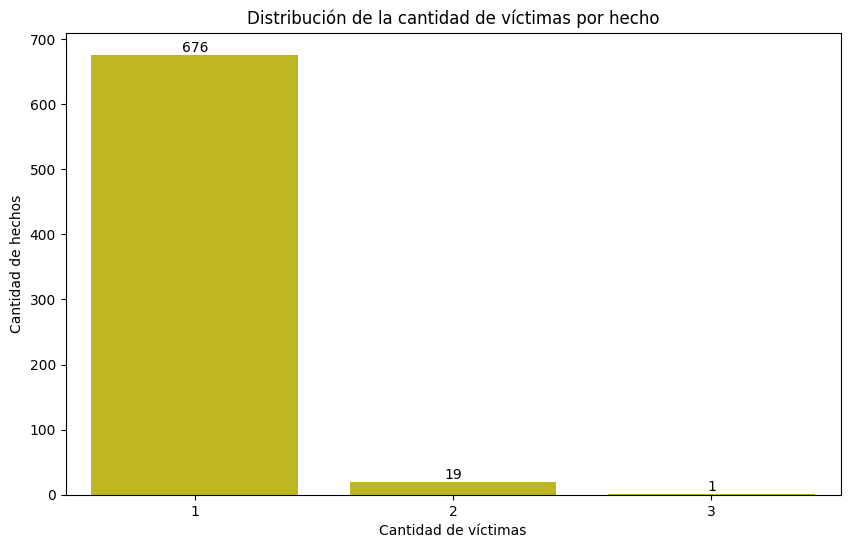

In [11]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.countplot(data=df_hechos, x='N_VICTIMAS', color="#d7cf07")

# Agregar etiquetas con el número exacto en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Establecer título y etiquetas de ejes
plt.title('Distribución de la cantidad de víctimas por hecho')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Cantidad de hechos')

plt.show()

In [29]:
# Crear la tabla resumen
resumen = df_hechos['N_VICTIMAS'].value_counts().reset_index()
resumen.columns = ['N_VICTIMAS', 'NUM_HECHOS']
resumen['PORCENTAJE'] = (resumen['NUM_HECHOS'] / resumen['NUM_HECHOS'].sum()) * 100
resumen = resumen.sort_values(by='N_VICTIMAS').reset_index(drop=True)

# Formatear la columna PORCENTAJE para que tenga solo dos decimales y el signo de %
resumen['PORCENTAJE'] = resumen['PORCENTAJE'].map(lambda x: f'{x:.2f}%')

display.display(resumen)


,N_VICTIMAS,NUM_HECHOS,PORCENTAJE
0,1,676,97.13%
1,2,19,2.73%
2,3,1,0.14%


Aunque normalmente estos accidentes tengan una victima, podemos ver que existen casos particulares en donde puede haber mas dde una victima 

# Distribucion de edad de las victimas en los accidentes

A continuacion se vera la cantidad de de victimas con base a la edad

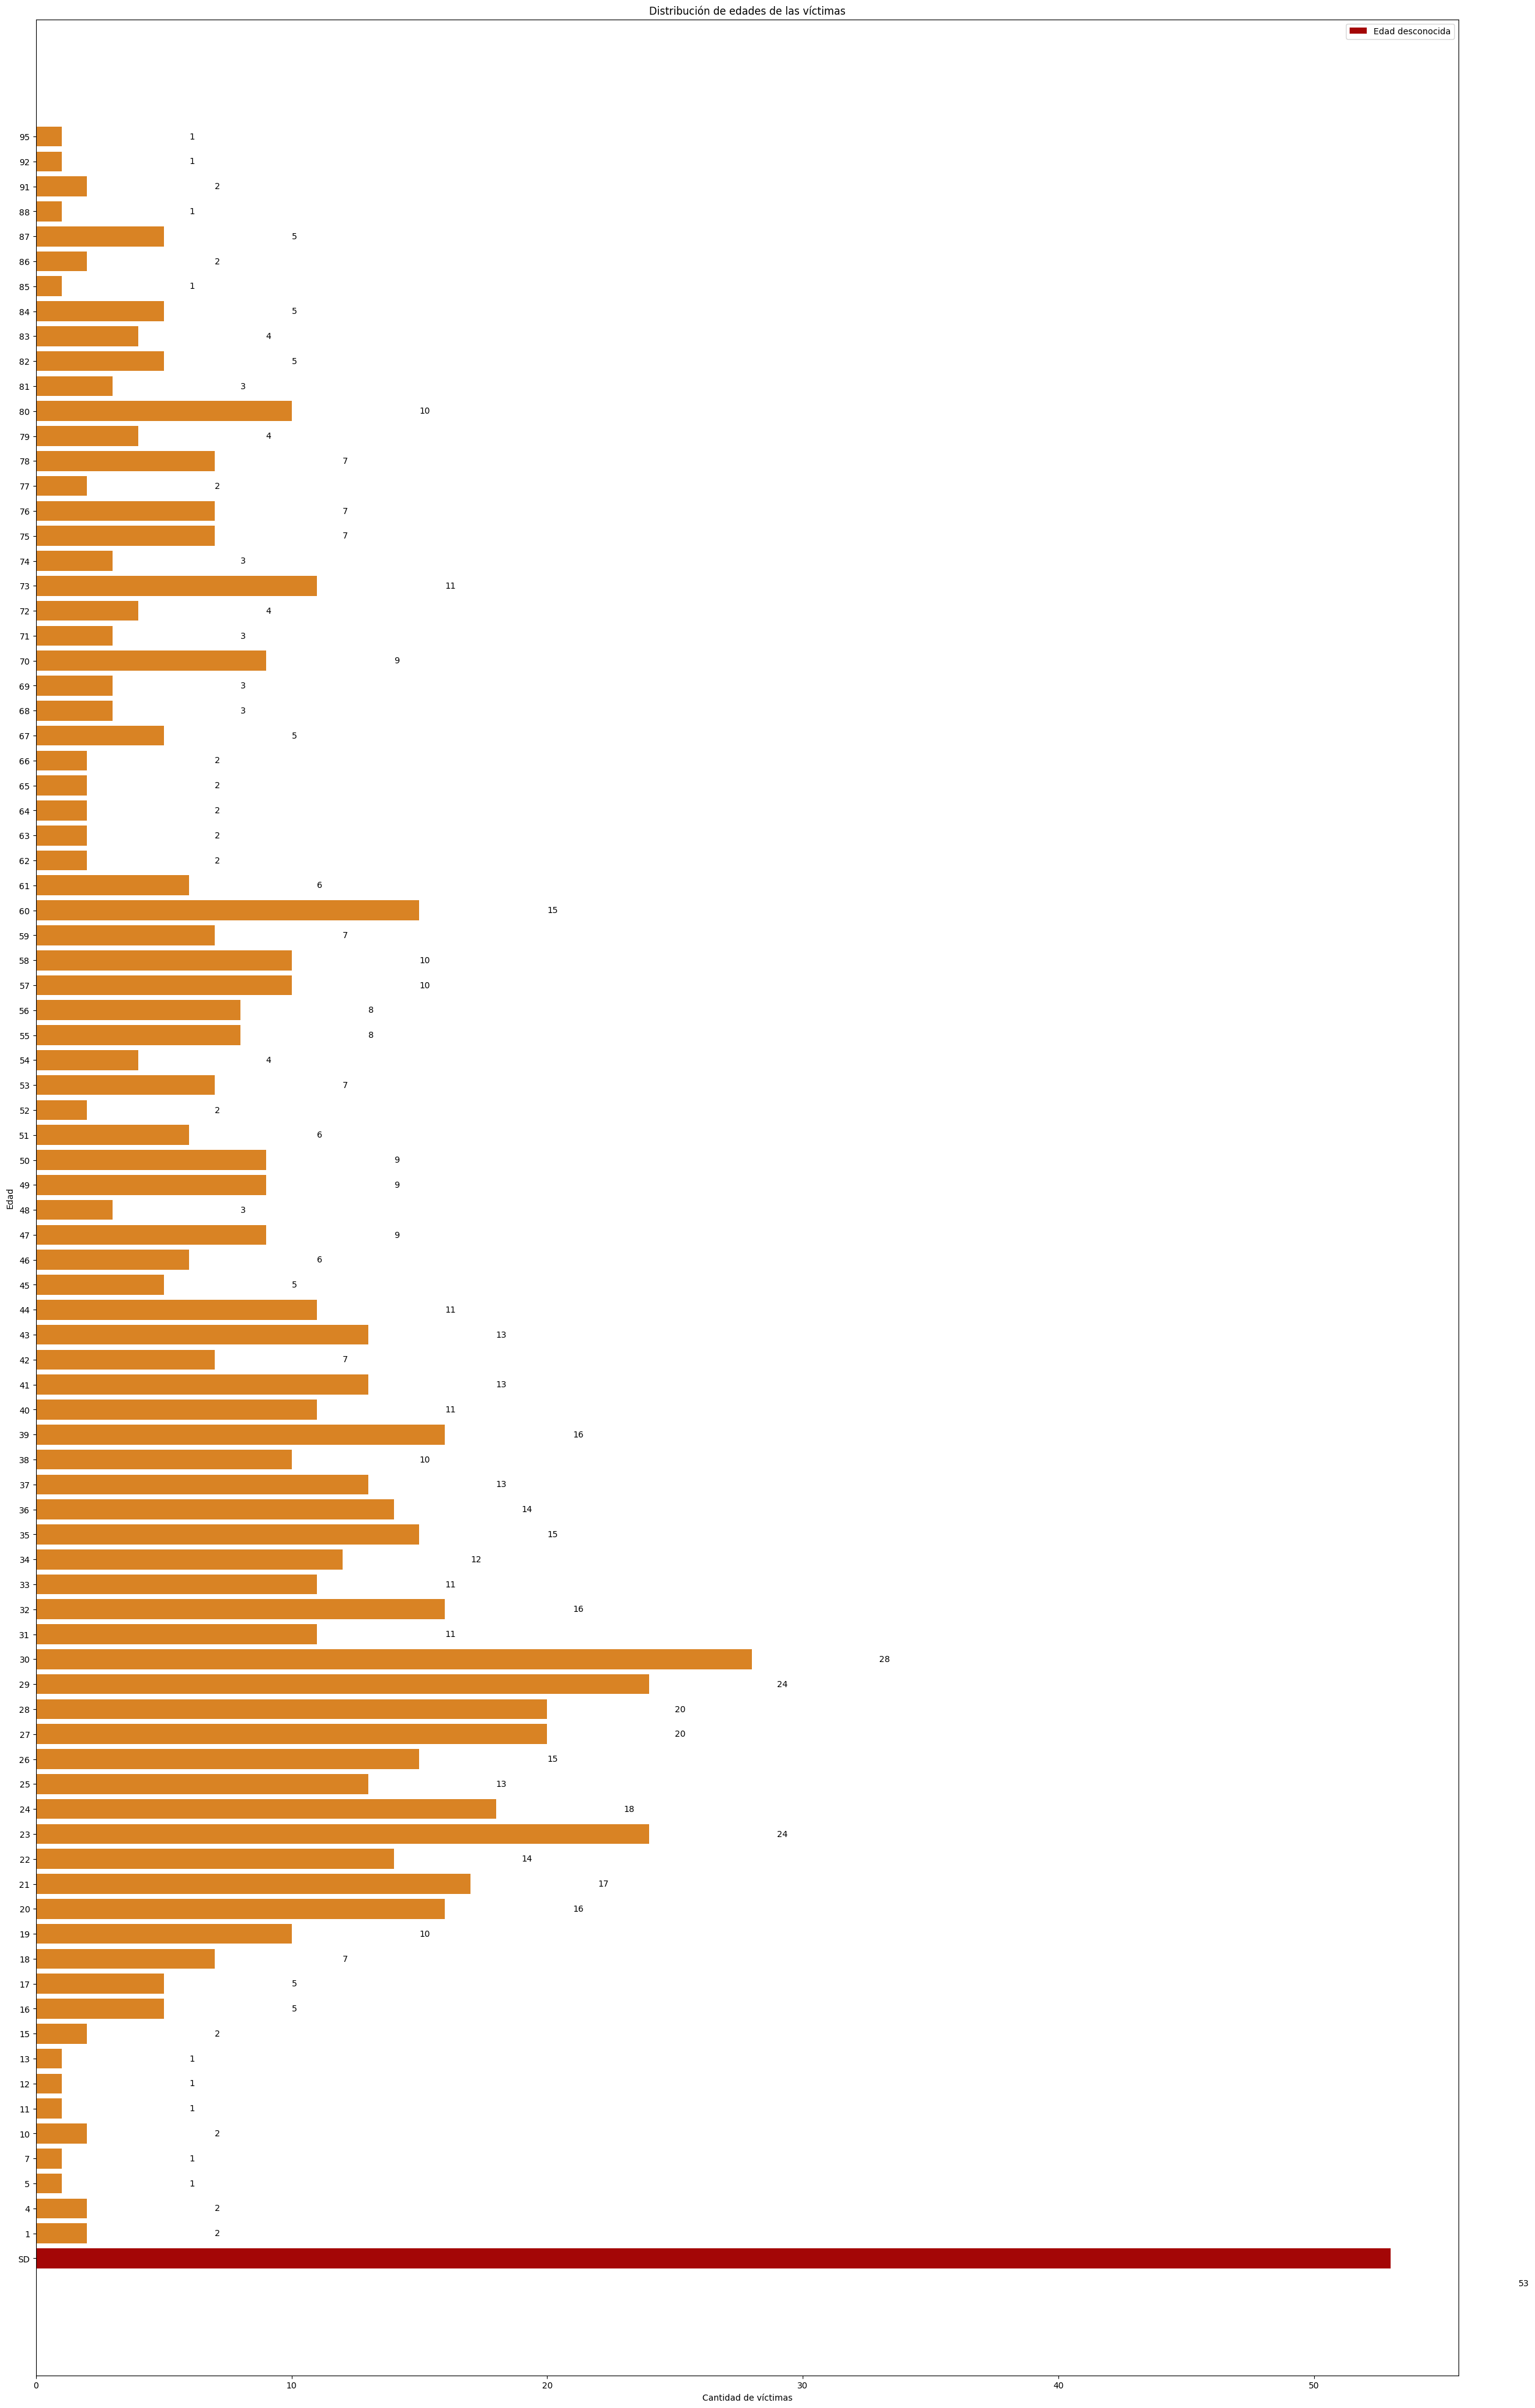

In [35]:
df_victimas['EDAD'].replace('SD', -1, inplace=True)

# Convertir la columna 'EDAD' a tipo numérico
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

# Contar la cantidad de víctimas por edad
age_counts = df_victimas['EDAD'].value_counts().sort_index()

# Crear una figura y ejes
plt.figure(figsize=(30, 50))
ax = plt.gca()

# Agregar barras para las edades desconocidas
if -1 in age_counts.index:
    ax.barh('SD', age_counts[-1], color='#a40606', label='Edad desconocida')
    ax.text(age_counts[-1] + 5, -1, str(age_counts[-1]), ha='left', va='center', color='black')

# Agregar barras para las edades conocidas
for i, (age, count) in enumerate(age_counts.items()):
    if age != -1:
        ax.barh(str(age), count, color='#d98324')
        ax.text(count + 5, i, str(count), ha='left', va='center', color='black')

# Establecer título y etiquetas de ejes
plt.title('Distribución de edades de las víctimas')
plt.ylabel('Edad')
plt.xlabel('Cantidad de víctimas')

# Mostrar leyenda
plt.legend()

plt.show()

Con estos datos procederemos a ver las edades donde mas frecuenta 

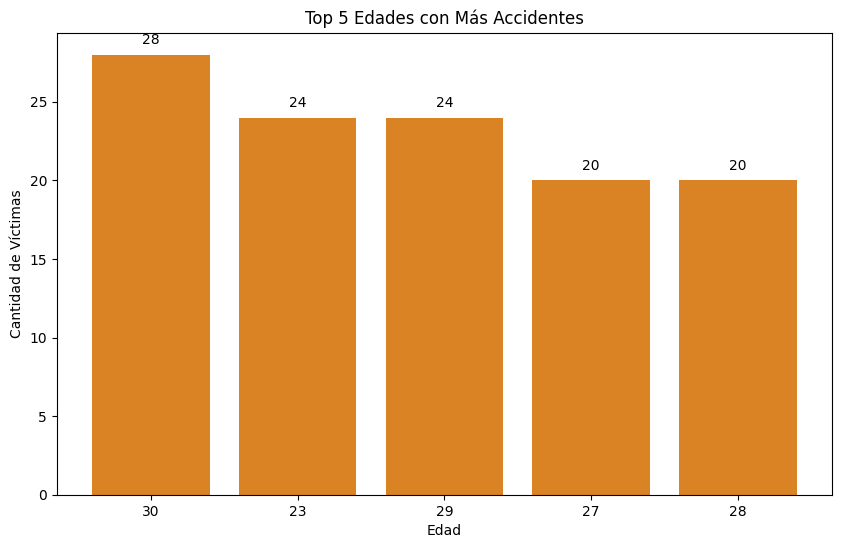

In [39]:
# Reemplazar 'SD' por -1 para edades desconocidas
df_victimas['EDAD'].replace('SD', -1, inplace=True)

# Convertir la columna 'EDAD' a tipo numérico
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

# Contar la cantidad de víctimas por edad
age_counts = df_victimas['EDAD'].value_counts().sort_index()

# Filtrar las edades desconocidas (-1)
age_counts = age_counts[age_counts.index != -1]

# Filtrar el top 5 de edades con más accidentes
top_5_ages = age_counts.nlargest(5)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Agregar barras para el top 5 de edades con más accidentes
ax.bar(top_5_ages.index.astype(str), top_5_ages.values, color='#d98324')

# Agregar etiquetas con el número exacto en cada barra
for i, (age, count) in enumerate(top_5_ages.items()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', color='black')

# Establecer título y etiquetas de ejes
plt.title('Top 5 Edades con Más Accidentes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Víctimas')

plt.show()



Para realizar el grafico anterior al valor SD(se desconoce) se le asigno el valor de -1 y fue excluido de la grafica.

Podemos ver que la edad donde mas frecuentan estos tipos de accidentes son en personas entre los 20 a 30 años, basandonos en informacion de la IOMA. estos son posibles factores de esto:



-Falta de medidas preventivas en el auto como por ejemplo: mal funcionamiento de las luces  del auto, falta de control de los frenos o del estado de las cubiertas, etc.


-Mala señalización y condiciones de las rutas.


-Falta de vigilancia en el respeto de las leyes para conducir.


-Venta de bebidas alcohólicas a menores.


# Sexo de las victimas

A continuacion vamos a ver cuantas son las victimas con base a su sexo

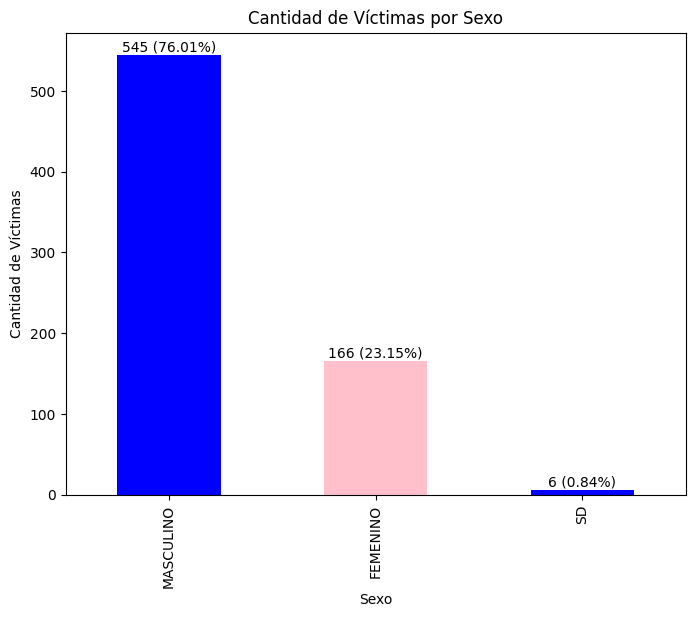

In [42]:
# Contar la cantidad de víctimas por sexo
gender_counts = df_victimas['SEXO'].value_counts()

# Calcular los porcentajes de cada género
total_victims = gender_counts.sum()
gender_percentages = (gender_counts / total_victims) * 100

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
gender_counts.plot(kind='bar', color=['blue', 'pink'])

# Agregar etiquetas con el número exacto y el porcentaje en cada barra
for i, (count, percentage) in enumerate(zip(gender_counts, gender_percentages)):
    plt.text(i, count + 0.5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', color='black')

# Establecer título y etiquetas de ejes
plt.title('Cantidad de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Víctimas')

# Establecer nombres de los ticks del eje x
plt.xticks(range(len(gender_counts.index)), gender_counts.index)

plt.show()


Podemos ver que normalmente las victimas son los hombres, siendo alrededor del triple que la cantidad de mujeres.
Aunque no se tenga una informacion concisa del porque de este suceso, se descarta el hecho de densidad poblacional ya que en Buenos Aires viven mas mujeres que hombres, siendo una razon de mayor peso el probable descuido o irresponsabilidad de los hombres en la via.

# Cantidad de accidentes por meses

A continuacion se analizara la cantidad de accidentes que han ocurrido en cada mes durante todos los años.

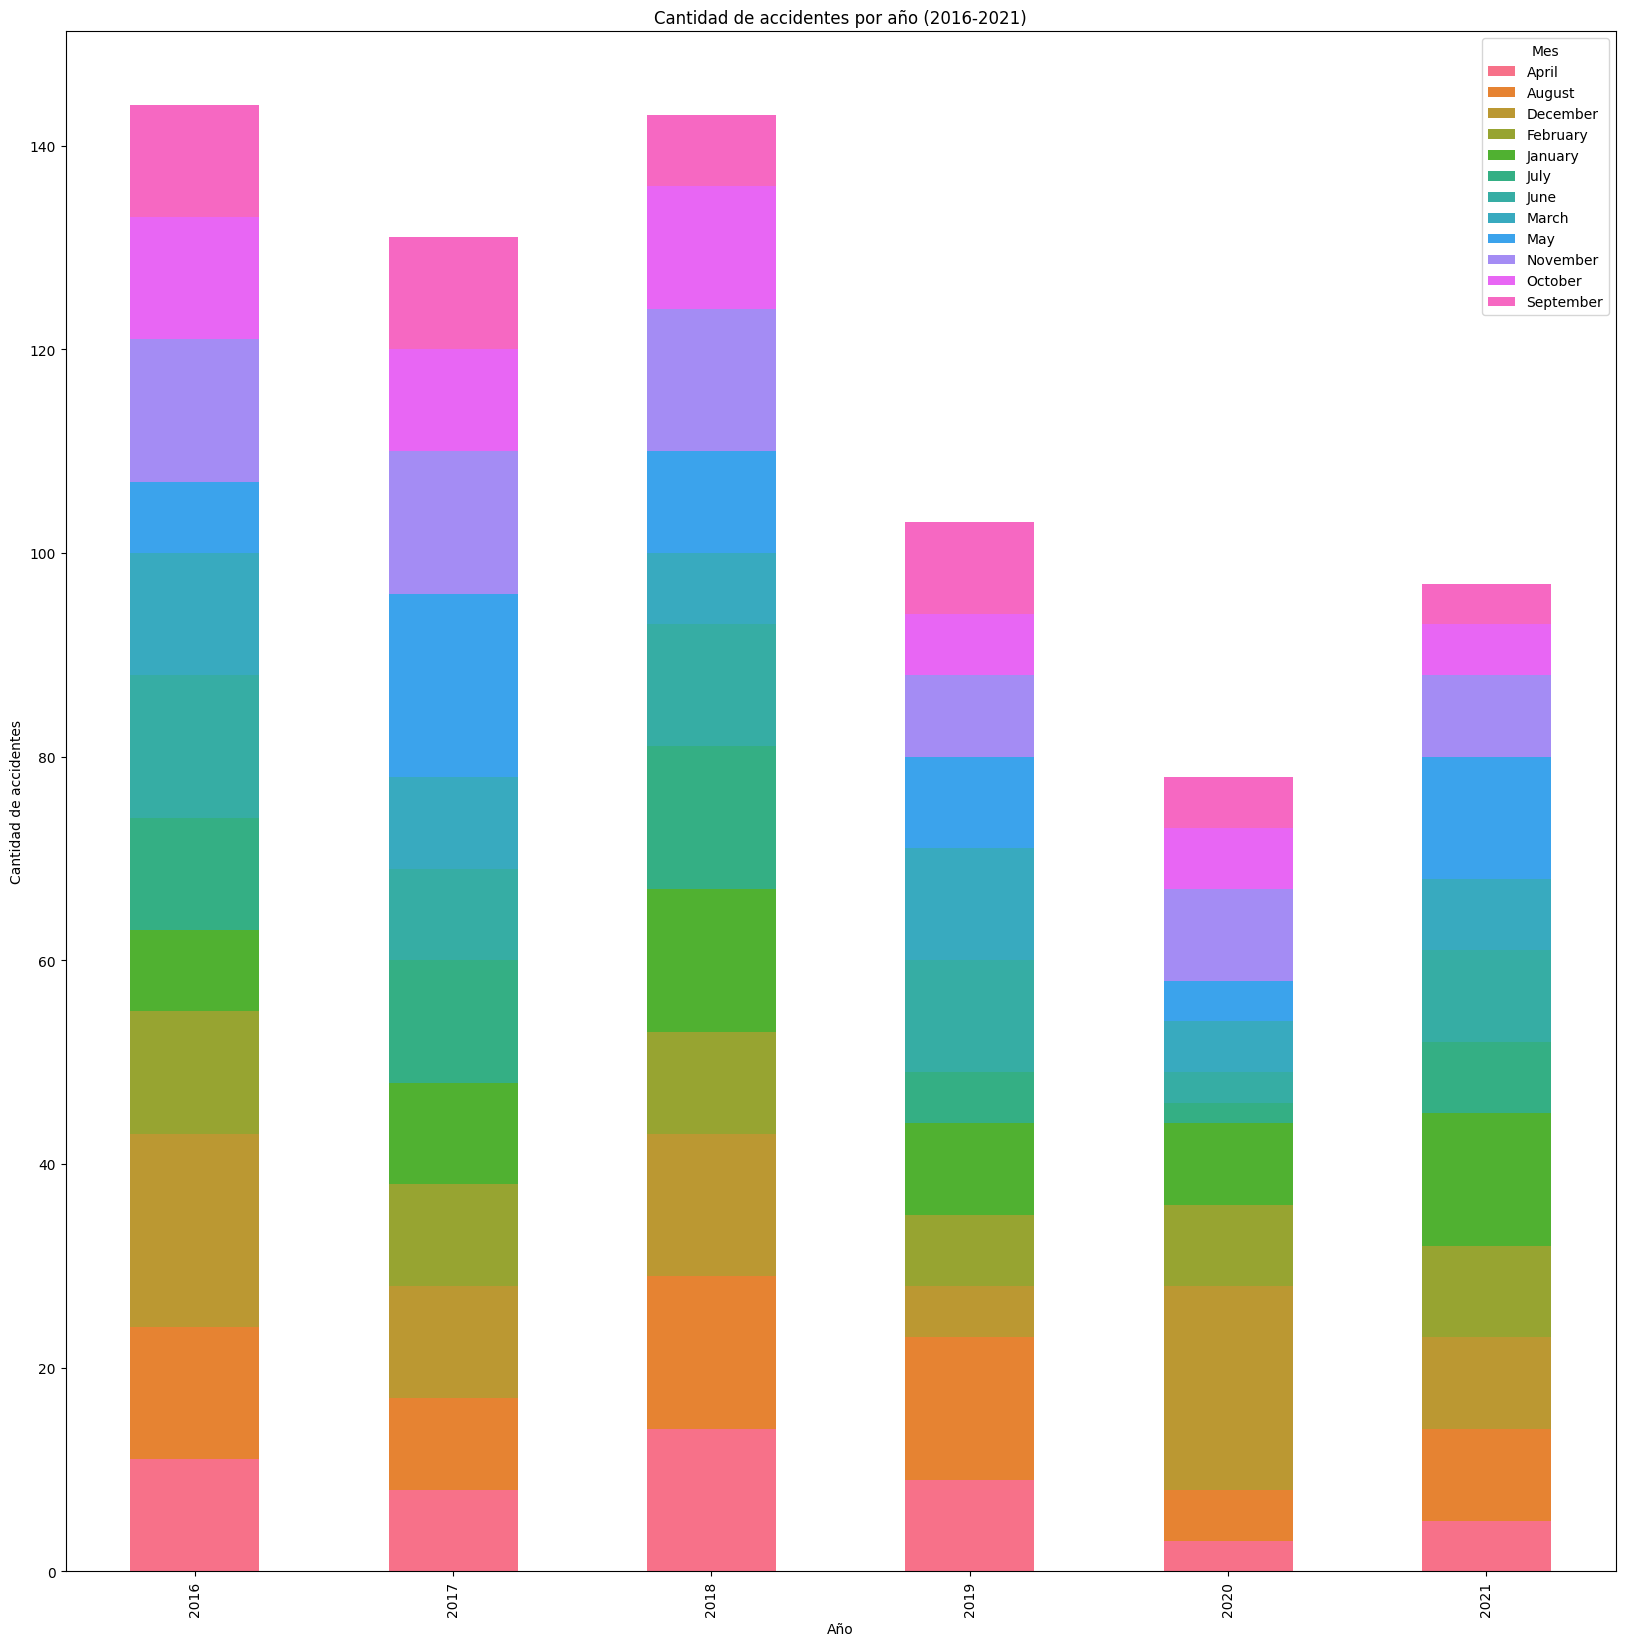

In [43]:
# Convertir la columna 'FECHA' al formato adecuado
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'], dayfirst=True)

# Extraer el año y el mes de cada fecha
df_hechos['AÑO'] = df_hechos['FECHA'].dt.year
df_hechos['MES'] = df_hechos['FECHA'].dt.month_name()

# Contar la cantidad de accidentes por año y mes
accidentes_por_mes = df_hechos.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)

# Crear una figura y ejes
plt.figure(figsize=(20, 20))

# Graficar la distribución de accidentes por mes con colores personalizados
accidentes_por_mes.plot(kind='bar', stacked=True, color=sns.color_palette('husl', n_colors=12), ax=plt.gca())

# Establecer título y etiquetas de ejes
plt.title('Cantidad de accidentes por año (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar la gráfica
plt.legend(title='Mes')
plt.show()

A continuacion see mostrara una tabla referente a los datos anteriores donde vamos a ver la cantidad de accidentes mas precisa por cada mes en cada uno de los años.


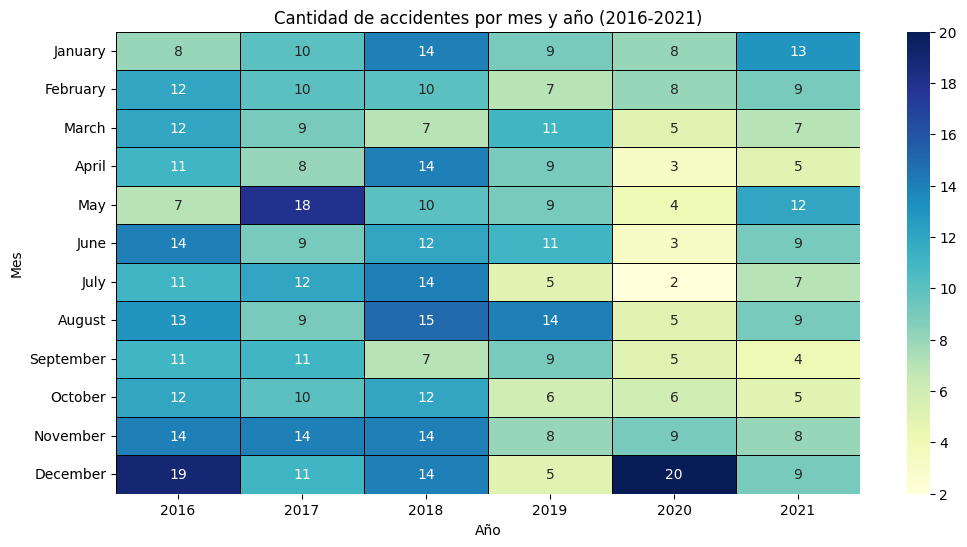

Promedio de accidentes por mes durante los años:
MES
January      10.33
February      9.33
March         8.50
April         8.33
May          10.00
June          9.67
July          8.50
August       10.83
September     7.83
October       8.50
November     11.17
December     13.00
dtype: float64


In [46]:
# Ordenar los meses correctamente
meses_ordenados = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_hechos['MES'] = pd.Categorical(df_hechos['MES'], categories=meses_ordenados, ordered=True)

# Contar la cantidad de accidentes por mes y año
accidentes_por_mes = df_hechos.groupby(['MES', 'AÑO'], observed=True).size().unstack(fill_value=0)

# Graficar la distribución de accidentes por mes
plt.figure(figsize=(12, 6))
sns.heatmap(accidentes_por_mes, cmap='YlGnBu', linewidths=0.5, linecolor='black', annot=True, fmt='d', cbar=True)
plt.title('Cantidad de accidentes por mes y año (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

# Calcular el promedio de accidentes por mes
promedio_accidentes_por_mes = accidentes_por_mes.mean(axis=1)

# Redondear el promedio de accidentes por mes a dos decimales
promedio_accidentes_por_mes = promedio_accidentes_por_mes.round(2)

# Mostrar el promedio de accidentes por mes
print("Promedio de accidentes por mes durante los años:")
print(promedio_accidentes_por_mes)

Con estos datos podemos percibir que el mes con mayor cantidad de accidentes a lo largo del tiempo es diciembre, esto puede ser relacionado a las fiestas que ocurren durante este mes

# Movilizacion de la vicitma

A continuacion re revisara con que tipo de vehiculo normalmente se movilizaba la vicima a la hora del accidente.

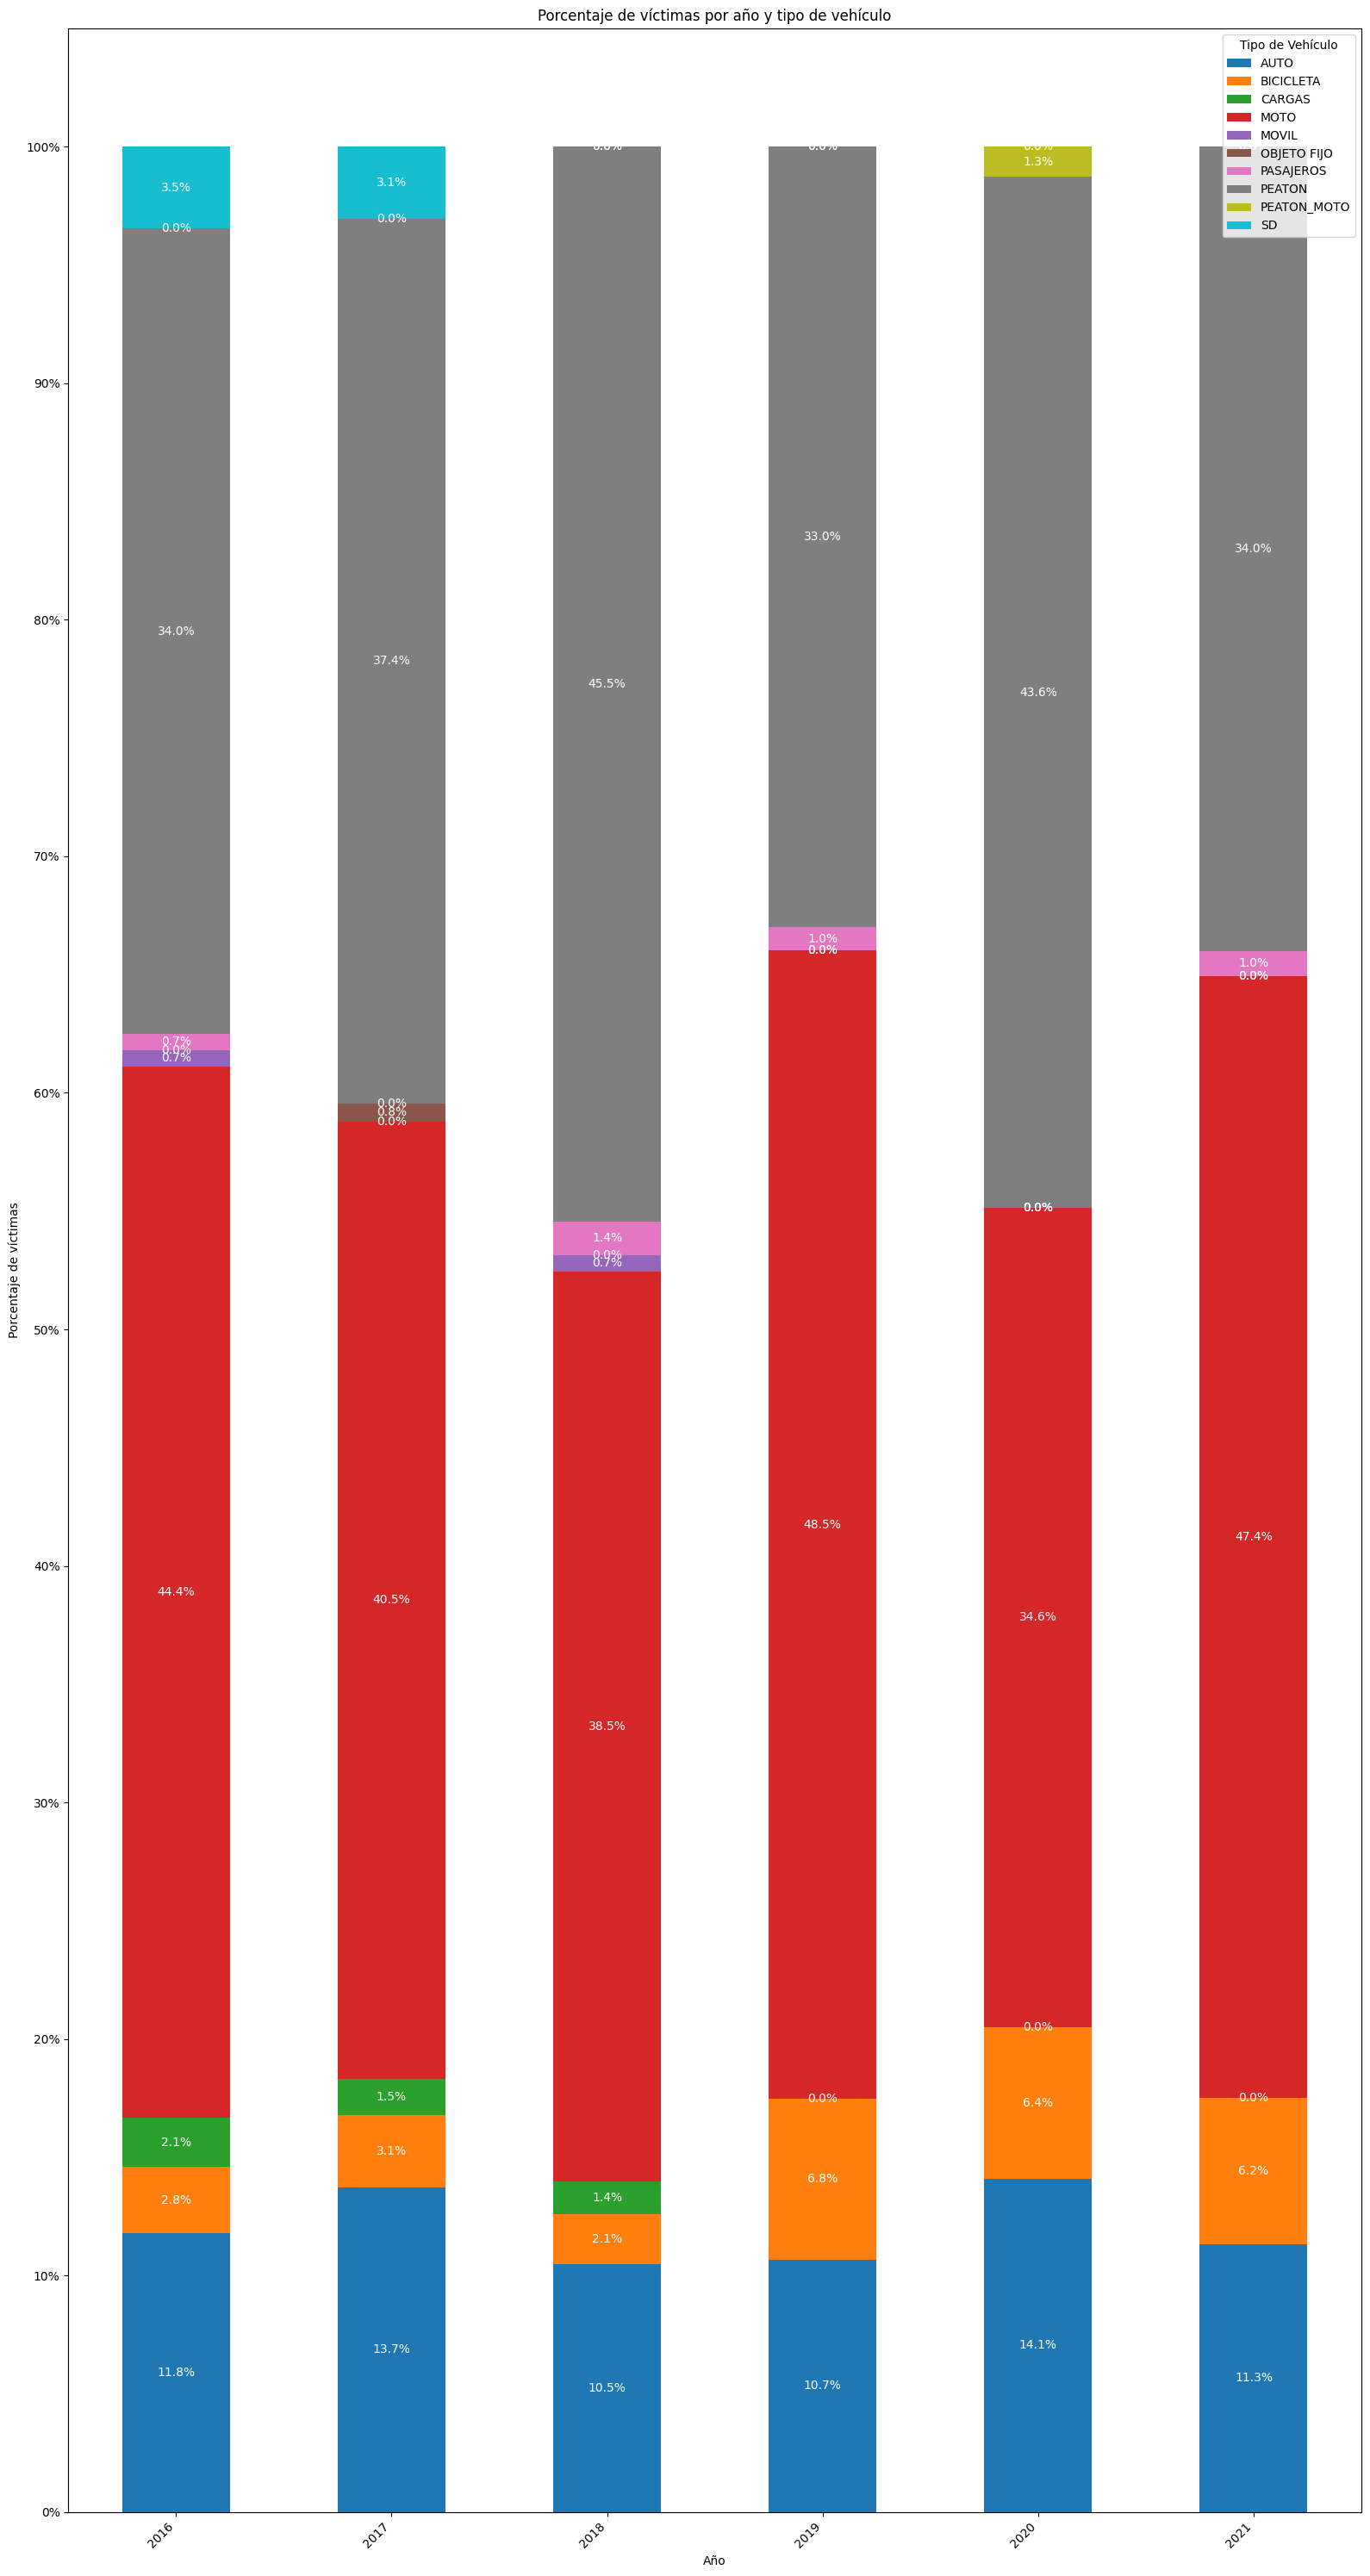

In [52]:
# Contar la cantidad de víctimas por año y tipo de vehículo
victimas_por_año = df_hechos.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)

# Calcular el total de víctimas por año
total_victimas_por_año = victimas_por_año.sum(axis=1)

# Calcular el porcentaje de víctimas por tipo de vehículo y año
porcentaje_victimas_por_año = victimas_por_año.divide(total_victimas_por_año, axis=0) * 100

# Graficar el porcentaje de víctimas por año y tipo de vehículo
ax = porcentaje_victimas_por_año.plot(kind='bar', stacked=True, figsize=(16, 30))
plt.title('Porcentaje de víctimas por año y tipo de vehículo')
plt.xlabel('Año')
plt.ylabel('Porcentaje de víctimas')
plt.legend(title='Tipo de Vehículo')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 101, 10), ['{}%'.format(i) for i in range(0, 101, 10)])  # Cambiar el eje y a porcentaje
plt.tight_layout()

# Mostrar los porcentajes dentro de las barras
for i in range(len(porcentaje_victimas_por_año)):
    y_offset = 0
    for j in range(len(porcentaje_victimas_por_año.columns)):
        porcentaje = porcentaje_victimas_por_año.iloc[i, j]
        ax.text(i, y_offset + porcentaje / 2, f'{porcentaje:.1f}%', ha='center', va='center', color='white')
        y_offset += porcentaje

plt.show()

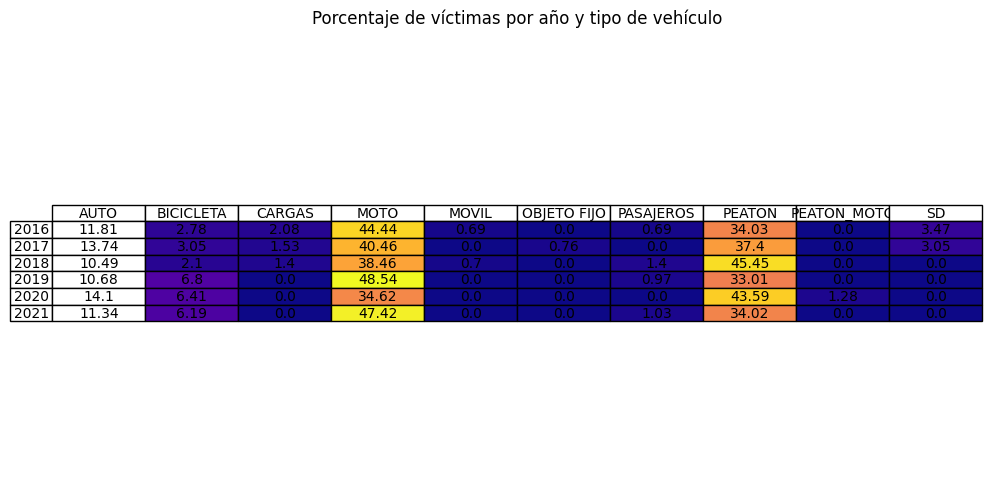

In [63]:
# Redondear los valores del DataFrame a dos decimales
porcentaje_victimas_por_año_redondeado = porcentaje_victimas_por_año.round(2)

# Crear una tabla vacía
plt.figure(figsize=(12, 6))
tabla = plt.table(cellText=porcentaje_victimas_por_año_redondeado.values,
                  rowLabels=porcentaje_victimas_por_año_redondeado.index,
                  colLabels=porcentaje_victimas_por_año_redondeado.columns,
                  loc='center', cellLoc='center')

# Ajustar el tamaño de la fuente en la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Ocultar los ejes
plt.axis('off')

# Obtener la escala de colores de la gama de infrarrojos
colormap = plt.cm.plasma

# Normalizar los valores para la escala de colores
norm = mcolors.Normalize(vmin=porcentaje_victimas_por_año_redondeado.values.min(), vmax=porcentaje_victimas_por_año_redondeado.values.max())

# Asignar colores a las celdas de la tabla según los valores de los porcentajes
for i, cell in enumerate(tabla._cells.values()):
    if i % (len(porcentaje_victimas_por_año_redondeado.columns)) == 0:
        continue  # Saltar las etiquetas de las filas
    fila, columna = divmod(i, len(porcentaje_victimas_por_año_redondeado.columns))
    if fila >= len(porcentaje_victimas_por_año_redondeado):
        continue  # Saltar las filas fuera de los límites del DataFrame
    valor = porcentaje_victimas_por_año_redondeado.values[fila, columna]
    cell.set_facecolor(colormap(norm(valor)))

# Mostrar la tabla
plt.title('Porcentaje de víctimas por año y tipo de vehículo')
plt.show()

Podemos verificar que las victimas a lo largo de los años son principalmente motos y peatones, se realiza la recomendacion a las principales victimas de tener mayor cuidado a la hora de transitar

# Movilizacion del acusado

Anteriormente vimos las victimas mas communes, ahora se veran los acusados mas comunes con el fin de generar advertencia a estos a la hora de conducir o a las victimas respecto a estos.

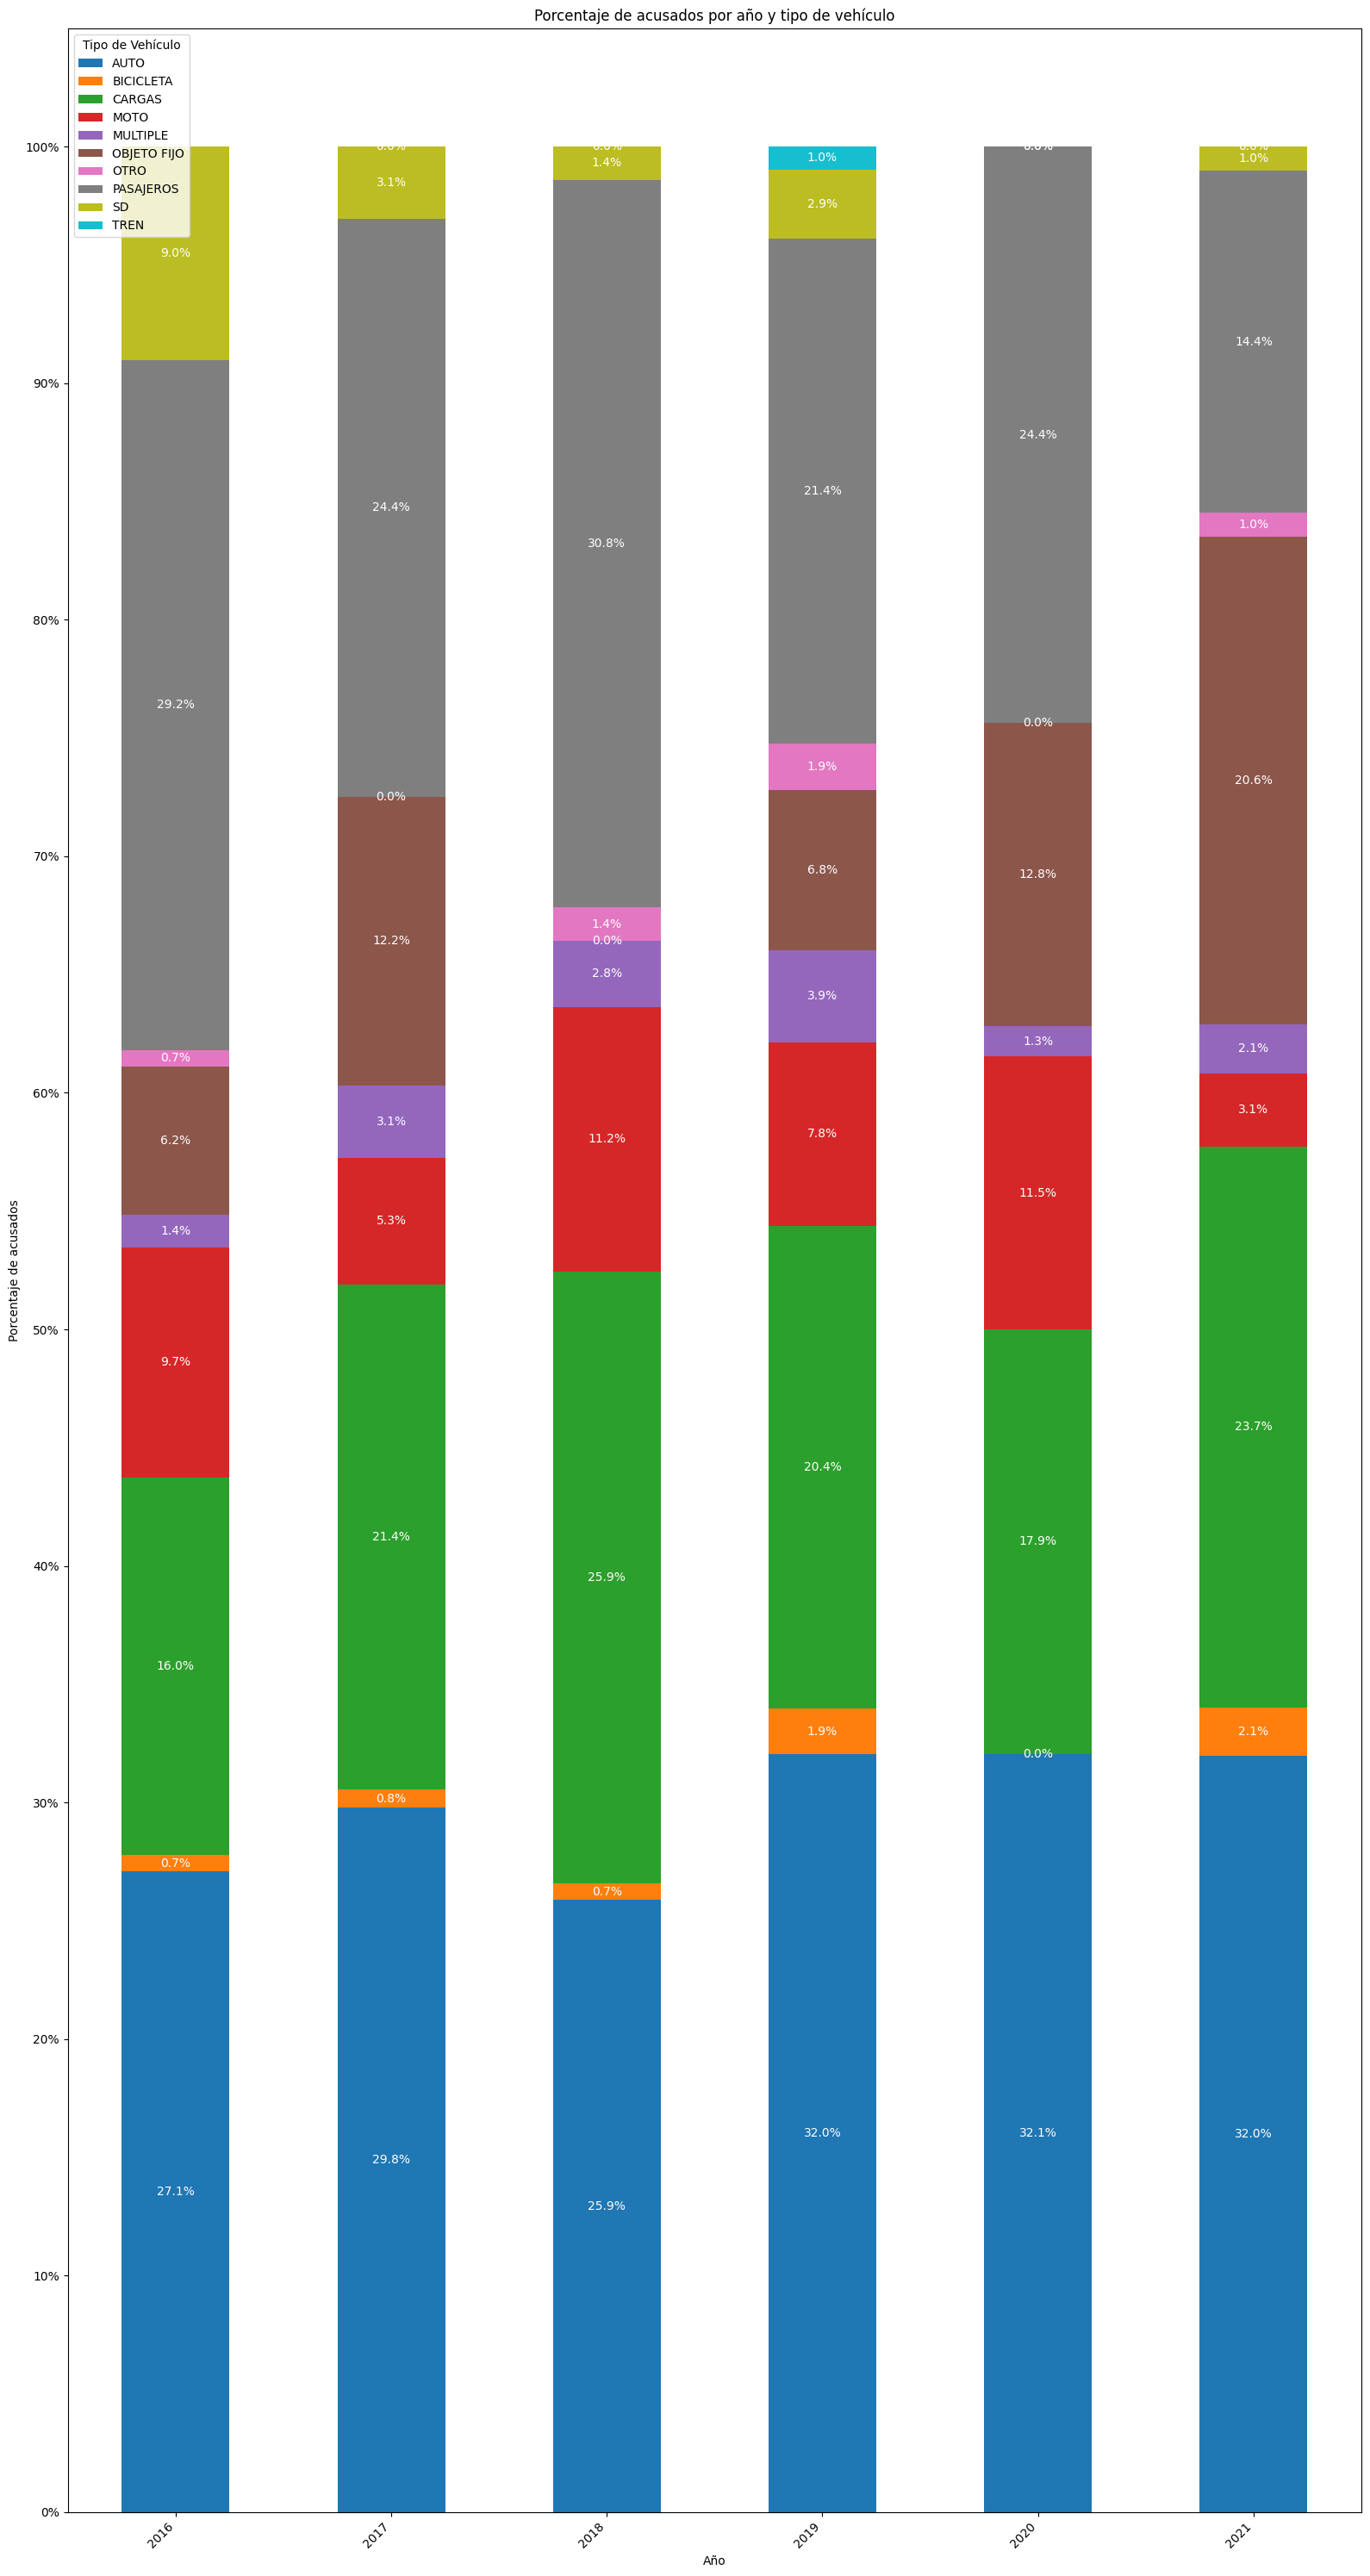

In [64]:
# Contar la cantidad de acusados por año y tipo de vehículo
acusados_por_año = df_hechos.groupby(['AÑO', 'ACUSADO']).size().unstack(fill_value=0)

# Calcular el total de acusados por año
total_acusados_por_año = acusados_por_año.sum(axis=1)

# Calcular el porcentaje de acusados por tipo de vehículo y año
porcentaje_acusados_por_año = acusados_por_año.divide(total_acusados_por_año, axis=0) * 100

# Graficar el porcentaje de acusados por año y tipo de vehículo
ax = porcentaje_acusados_por_año.plot(kind='bar', stacked=True, figsize=(16, 30))
plt.title('Porcentaje de acusados por año y tipo de vehículo')
plt.xlabel('Año')
plt.ylabel('Porcentaje de acusados')
plt.legend(title='Tipo de Vehículo')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 101, 10), ['{}%'.format(i) for i in range(0, 101, 10)])  # Cambiar el eje y a porcentaje
plt.tight_layout()

# Mostrar los porcentajes dentro de las barras
for i in range(len(porcentaje_acusados_por_año)):
    y_offset = 0
    for j in range(len(porcentaje_acusados_por_año.columns)):
        porcentaje = porcentaje_acusados_por_año.iloc[i, j]
        ax.text(i, y_offset + porcentaje / 2, f'{porcentaje:.1f}%', ha='center', va='center', color='white')
        y_offset += porcentaje

plt.show()

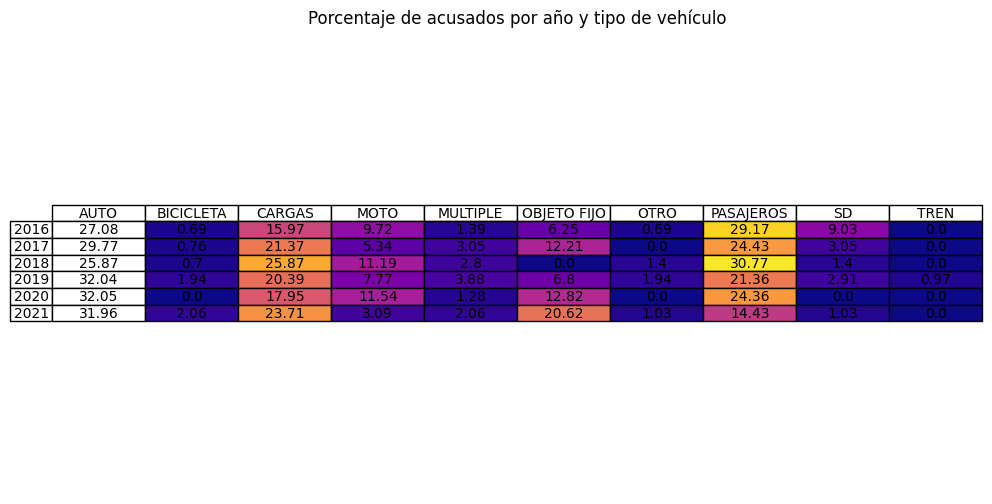

In [66]:
# Redondear los valores del DataFrame a dos decimales
porcentaje_acusados_por_año_redondeado = porcentaje_acusados_por_año.round(2)

# Crear una tabla vacía
plt.figure(figsize=(12, 6))
tabla = plt.table(cellText=porcentaje_acusados_por_año_redondeado.values,
                  rowLabels=porcentaje_acusados_por_año_redondeado.index,
                  colLabels=porcentaje_acusados_por_año_redondeado.columns,
                  loc='center', cellLoc='center')

# Ajustar el tamaño de la fuente en la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Ocultar los ejes
plt.axis('off')

# Obtener la escala de colores de la gama de plasma
colormap = plt.cm.plasma

# Normalizar los valores para la escala de colores
norm = mcolors.Normalize(vmin=porcentaje_acusados_por_año_redondeado.values.min(), vmax=porcentaje_acusados_por_año_redondeado.values.max())

# Asignar colores a las celdas de la tabla según los valores de los porcentajes
for i, cell in enumerate(tabla._cells.values()):
    if i % (len(porcentaje_acusados_por_año_redondeado.columns)) == 0:
        continue  # Saltar las etiquetas de las filas
    fila, columna = divmod(i, len(porcentaje_acusados_por_año_redondeado.columns))
    if fila >= len(porcentaje_acusados_por_año_redondeado):
        continue  # Saltar las filas fuera de los límites del DataFrame
    valor = porcentaje_acusados_por_año_redondeado.values[fila, columna]
    cell.set_facecolor(colormap(norm(valor)))

# Mostrar la tabla
plt.title('Porcentaje de acusados por año y tipo de vehículo')
plt.show()

Se evidencia que principalmente los pasajeros y carros de carga son acusados por eso mismo, a la par se hace mencion de las motos y objetos fijos por lo cual se pide precaucion y atencion a la hora de manejar

# Distribucion geografica

A continuacion se daran dos mapas, los cuales tienen a distribucion de los accidentes en la ciudad de Buenos Aires.

## Mapa de ubicaciones
A continuacion se mostrara el mapa de buenos aires con los pints donde han ocurrido accidentes

In [67]:
df_hechos['pos x'].replace('SD', pd.NA, inplace=True)
df_hechos['pos y'].replace('SD', pd.NA, inplace=True)

# Convertir las columnas de coordenadas a números
df_hechos['pos x'] = pd.to_numeric(df_hechos['pos x'], errors='coerce')
df_hechos['pos y'] = pd.to_numeric(df_hechos['pos y'], errors='coerce')

# Eliminar filas con valores NaN en las coordenadas
df_hechos = df_hechos.dropna(subset=['pos x', 'pos y'])

# Crear un mapa centrado en la ubicación promedio de los hechos
mapa = folium.Map(location=[df_hechos['pos y'].mean(), df_hechos['pos x'].mean()], zoom_start=12)

# Añadir marcadores para cada incidente
for index, row in df_hechos.iterrows():
    folium.Marker([row['pos y'], row['pos x']], popup=row['LUGAR_DEL_HECHO']).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_de_hechos.html')
mapa

El codigo al ser ejecutado a parte de mostrarnos el mapa, tambien guardara un html en caso de que por razones de comodidad quera  verse mejor en un navegador

## Mapa con Infrarojo

Con este mapa se busca ver mas de cerca las zonas donde han sido mas comunes estos accidentes.

In [70]:
# Eliminar filas con datos faltantes en las columnas de posición
df_hechos = df_hechos.dropna(subset=['pos x', 'pos y'])

# Crear una GeoDataFrame con las coordenadas de los incidentes
geometry = [Point(xy) for xy in zip(df_hechos['pos x'], df_hechos['pos y'])]
gdf = gpd.GeoDataFrame(df_hechos, geometry=geometry)

# Cargar datos geoespaciales de límites de comunas (ejemplo)
comunas = gpd.read_file(r"C:\Users\mateo\OneDrive\Escritorio\data science\labs 2\SINIESTROSVIALES\Base de datos\comunas.geojson")

# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Agregar límites de comunas al mapa
folium.GeoJson(comunas).add_to(mapa)

# Agregar un mapa de calor de los incidentes
heat_data = [[row['pos y'], row['pos x']] for index, row in df_hechos.iterrows()]
HeatMap(heat_data).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa.html')
mapa